In [39]:
import numpy as np
import torch

from torchqc.states import QuantumState
from torchqc.common_functions import get_density_matrix, \
    expect_val_dm
from torchqc.operators import DynamicOperator
from torchqc.common_matrices import sigmaY, sigmaX
from torchqc.dynamics import TDSE, lindblad_equation
import matplotlib.pyplot as plt

In [40]:
device = "cpu"

if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")

* Start from basis state $\ket{0}$

In [41]:
n = 2
basis_states = QuantumState.basis(n)
initial_state = basis_states[0].to(device)

* Simulate dynamics with TDSE

In [42]:
T = 10
Dt = 0.1
time = np.arange(0, T + Dt, Dt, dtype = np.float32)

hamiltonian = DynamicOperator(dims=n, Ht=sigmaX().to(device), 
                              time=time)

states = TDSE(initial_state, hamiltonian, time, Dt)

* Print Rabi oscillations

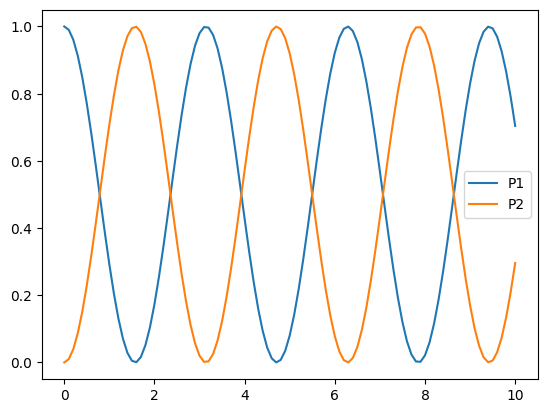

In [43]:
populations = np.array(
    [state.populations().cpu() for state in states]
    )

fig, ax = plt.subplots()

ax.plot(time, populations[:,0], label = "P1")
ax.plot(time, populations[:,1], label = "P2")
ax.legend()

* Simulate dynamics with von-Neumann equations

In [44]:
_, libland_states = lindblad_equation(get_density_matrix(initial_state), hamiltonian, time, Dt)
P1_libland = np.array([torch.real(state.matrix[0][0]).cpu() for state in libland_states])
P2_libland = np.array([torch.real(state.matrix[1][1]).cpu() for state in libland_states])

Text(0.5, 0, 't')

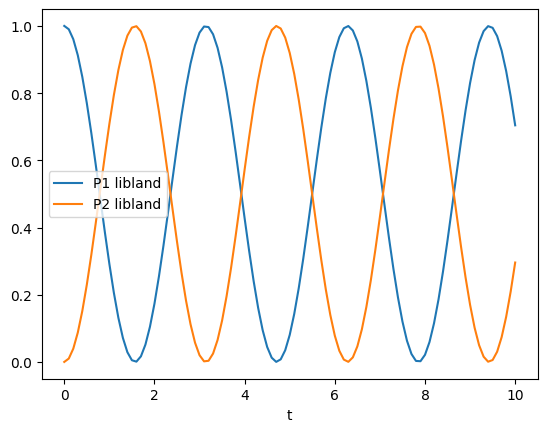

In [45]:
fig, ax = plt.subplots()

# ax.plot(time, P1[:-1], label = "P1")
# ax.plot(time, P2[:-1], label = "P2")
ax.plot(time, P1_libland, label = "P1 libland")
ax.plot(time, P2_libland, label = "P2 libland")
ax.legend()
ax.set_xlabel('t')

In [46]:
expect_Z_list = expect_val_dm(libland_states, sigmaY().to(device))
expect_Z = np.array(expect_Z_list.cpu())

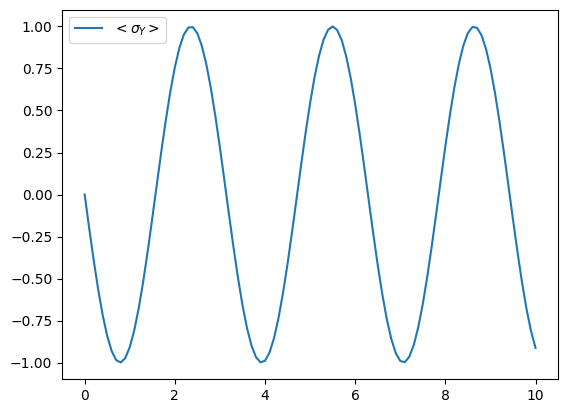

In [47]:
fig, ax = plt.subplots()

ax.plot(time, expect_Z, label = r"$<\sigma_Y>$")
ax.legend()